In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [41]:
claimants=pd.read_csv("C:/Users/ajay/OneDrive/Desktop/Team8-DE final project - Copy/claimants.csv")


In [3]:
#Removing CASENUM
c1= claimants.drop('CASENUM',axis=1)
print(c1)
print(c1.describe())
c1.isna().sum()

      ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0            0     0.0       1.0       0.0    50.0  34.940
1            1     1.0       0.0       0.0    18.0   0.891
2            1     0.0       1.0       0.0     5.0   0.330
3            0     0.0       1.0       1.0    31.0   0.037
4            1     0.0       1.0       0.0    30.0   0.038
...        ...     ...       ...       ...     ...     ...
1335         1     0.0       1.0       0.0     NaN   0.576
1336         0     1.0       1.0       0.0    46.0   3.705
1337         1     1.0       1.0       0.0    39.0   0.099
1338         0     1.0       0.0       0.0     8.0   3.177
1339         1     1.0       1.0       0.0    30.0   0.688

[1340 rows x 6 columns]
          ATTORNEY       CLMSEX     CLMINSUR     SEATBELT       CLMAGE   
count  1340.000000  1328.000000  1299.000000  1292.000000  1151.000000  \
mean      0.488806     0.558735     0.907621     0.017028    28.414422   
std       0.500061     0.496725     0.289671 

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [4]:
#To drop Nan Values
df= claimants.dropna()
print(df)

      CASENUM  ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0           5         0     0.0       1.0       0.0    50.0  34.940
1           3         1     1.0       0.0       0.0    18.0   0.891
2          66         1     0.0       1.0       0.0     5.0   0.330
3          70         0     0.0       1.0       1.0    31.0   0.037
4          96         1     0.0       1.0       0.0    30.0   0.038
...       ...       ...     ...       ...       ...     ...     ...
1334    34104         1     1.0       1.0       0.0    16.0   0.060
1336    34110         0     1.0       1.0       0.0    46.0   3.705
1337    34113         1     1.0       1.0       0.0    39.0   0.099
1338    34145         0     1.0       0.0       0.0     8.0   3.177
1339    34153         1     1.0       1.0       0.0    30.0   0.688

[1096 rows x 7 columns]


In [5]:
# To avoid droping missing values, we can go with Mean Imputation
# Mean Imputation- CLMAGE is a contionous data
mean_value=c1.CLMAGE.mean()
mean_value
c1.CLMAGE = c1.CLMAGE.fillna(mean_value)
c1.CLMAGE.isna().sum()
print(c1)


      ATTORNEY  CLMSEX  CLMINSUR  SEATBELT     CLMAGE    LOSS
0            0     0.0       1.0       0.0  50.000000  34.940
1            1     1.0       0.0       0.0  18.000000   0.891
2            1     0.0       1.0       0.0   5.000000   0.330
3            0     0.0       1.0       1.0  31.000000   0.037
4            1     0.0       1.0       0.0  30.000000   0.038
...        ...     ...       ...       ...        ...     ...
1335         1     0.0       1.0       0.0  28.414422   0.576
1336         0     1.0       1.0       0.0  46.000000   3.705
1337         1     1.0       1.0       0.0  39.000000   0.099
1338         0     1.0       0.0       0.0   8.000000   3.177
1339         1     1.0       1.0       0.0  30.000000   0.688

[1340 rows x 6 columns]


In [6]:
# Mode Imputation - for Discrete variables
# CLMSEX
mode_CLMSEX= c1.CLMSEX.mode()
mode_CLMSEX
c1.CLMSEX = c1.CLMSEX.fillna((mode_CLMSEX[0]))
c1.CLMSEX.isna().sum()

0

In [7]:
# SEATBELT
mode_SEATBELT=c1['SEATBELT'].mode()
mode_SEATBELT
c1['SEATBELT']=c1['SEATBELT'].fillna((mode_SEATBELT)[0])
c1.SEATBELT.isna().sum()

0

In [8]:
# CLMINSUR
mode_INSUR = c1['CLMINSUR'].mode()
mode_INSUR
c1['CLMINSUR']=c1['CLMINSUR'].fillna((mode_SEATBELT)[0])
c1.CLMINSUR.isna().sum()

0

In [9]:
# MODEL BUILDING
import statsmodels.formula.api as sm
logit_model = sm.logit('ATTORNEY ~ CLMAGE + LOSS + CLMINSUR + CLMSEX + SEATBELT', data=c1).fit()

Optimization terminated successfully.
         Current function value: 0.608590
         Iterations 7


In [10]:
# Summary
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                 1340
Model:                          Logit   Df Residuals:                     1334
Method:                           MLE   Df Model:                            5
Date:                Sat, 29 Apr 2023   Pseudo R-squ.:                  0.1217
Time:                        10:21:18   Log-Likelihood:                -815.51
converged:                       True   LL-Null:                       -928.48
Covariance Type:            nonrobust   LLR p-value:                 7.921e-47
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1147      0.202     -0.567      0.571      -0.511       0.282
CLMAGE         0.0065      0.003      2.037      0.042       0.000       0.013
LOSS          -0.3236      0.030    -10.965      0.000      -0.381      -0.266
CLMINSUR       0.5134      0.184      2.791      0.005       0.153       0.874
CLMSEX         0.3176      0.120      2.649      0.008       0.083       0.553
SEATBELT      -0.6877      0.523     -1.316      0.188      -1.712       0.336
==============================================================================
"""

In [11]:
# FOR AIC- Akakie Information Criteria
# Lesser the AIC we will get better model
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.122     
Dependent Variable: ATTORNEY         AIC:              1643.0201 
Date:               2023-04-29 10:21 BIC:              1674.2227 
No. Observations:   1340             Log-Likelihood:   -815.51   
Df Model:           5                LL-Null:          -928.48   
Df Residuals:       1334             LLR p-value:      7.9206e-47
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -0.1147    0.2023   -0.5671  0.5706  -0.5111   0.2817
CLMAGE        0.0065    0.0032    2.0366  0.0417   0.0002   0.0128
LOSS         -0.3236    0.0295  -10.9654  0.0000  -0.3815  -0.2658
CLMINSUR      0.5134    0.1840    2.7907  0.0053   0.1528   0.8739
CLMSEX        0.3176    0.1199    2.6491  0.0081   0.0826   0.5526
SEATBELT     -0.6877    0.5226   -1.3161  0.1882  -1.7119   0.3365
=================================================================

"""

In [12]:
pred = logit_model.predict(c1.iloc[ : ,1: ])
print(pred)

0       0.000025
1       0.507897
2       0.580390
3       0.475160
4       0.641402
          ...   
1335    0.597974
1336    0.454215
1337    0.718662
1338    0.315773
1339    0.665675
Length: 1340, dtype: float64


In [13]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(c1.ATTORNEY, pred)
optimal_idx = np.argmax(tpr-fpr)
print(optimal_idx)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

320


0.5295156956581772

In [14]:
import pylab as pl
i= np.arange(len(tpr))
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i), 'tpr': pd.Series(tpr, index =i), '1-fpr': pd.Series(1-fpr, index=i), 'tf': pd.Series(tpr-(1-fpr), index =i), 'thresholds': pd.Series(thresholds, index=i)})
roc

,fpr,tpr,1-fpr,tf,thresholds
0,0.000000,0.000000,1.000000,-1.000000,1.771826e+00
1,0.000000,0.001527,1.000000,-0.998473,7.718259e-01
2,0.000000,0.003053,1.000000,-0.996947,7.697785e-01
3,0.001460,0.003053,0.998540,-0.995487,7.613602e-01
4,0.001460,0.007634,0.998540,-0.990907,7.588282e-01
...,...,...,...,...,...
557,0.931387,0.996947,0.068613,0.928333,4.202859e-02
558,0.931387,0.998473,0.068613,0.929860,4.047960e-02
559,0.992701,0.998473,0.007299,0.991174,1.333337e-11
560,0.992701,1.000000,0.007299,0.992701,7.391740e-12


Text(0, 0.5, 'True Positive rate')

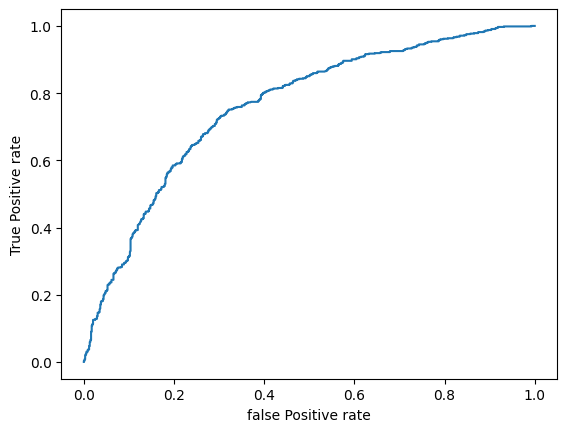

In [15]:
# plot ROC
plt.plot(fpr, tpr);plt.xlabel("false Positive rate");plt.ylabel("True Positive rate")


In [16]:
roc_auc = auc(fpr, tpr)
print("Area under the curve : %f" % roc_auc)

Area under the curve : 0.760892


In [17]:
# taking new column with zeros
c1["pred"]= np.zeros(1340)
c1.loc[pred > optimal_threshold, "pred"]=1

In [18]:
# classification report
from sklearn.metrics import classification_report
classification = classification_report(c1["pred"],c1["ATTORNEY"])
print(classification)

              precision    recall  f1-score   support

         0.0       0.68      0.74      0.71       629
         1.0       0.75      0.69      0.72       711

    accuracy                           0.71      1340
   macro avg       0.71      0.71      0.71      1340
weighted avg       0.72      0.71      0.71      1340



In [19]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(c1, test_size= 0.3)

In [20]:
# model building
model = sm.logit('ATTORNEY ~ CLMAGE + LOSS + CLMINSUR + CLMSEX + SEATBELT', data=train_data).fit()

Optimization terminated successfully.
         Current function value: 0.590737
         Iterations 7


In [21]:
model.summary2() # for AIC

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.147     
Dependent Variable: ATTORNEY         AIC:              1120.2230 
Date:               2023-04-29 10:21 BIC:              1149.2855 
No. Observations:   938              Log-Likelihood:   -554.11   
Df Model:           5                LL-Null:          -649.63   
Df Residuals:       932              LLR p-value:      2.3540e-39
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -0.2269    0.2442   -0.9291  0.3529  -0.7055   0.2518
CLMAGE        0.0105    0.0040    2.6590  0.0078   0.0028   0.0183
LOSS         -0.4105    0.0395  -10.3811  0.0000  -0.4881  -0.3330
CLMINSUR      0.5512    0.2256    2.4433  0.0146   0.1090   0.9934
CLMSEX        0.4612    0.1466    3.1459  0.0017   0.1739   0.7485
SEATBELT     -0.3742    0.5668   -0.6602  0.5091  -1.4851   0.7367
=================================================================

"""

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                  938
Model:                          Logit   Df Residuals:                      932
Method:                           MLE   Df Model:                            5
Date:                Sat, 29 Apr 2023   Pseudo R-squ.:                  0.1470
Time:                        10:21:20   Log-Likelihood:                -554.11
converged:                       True   LL-Null:                       -649.63
Covariance Type:            nonrobust   LLR p-value:                 2.354e-39
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2269      0.244     -0.929      0.353      -0.706       0.252
CLMAGE         0.0105      0.004      2.659      0.008       0.003       0.018
LOSS          -0.4105      0.040    -10.381      0.000      -0.488      -0.333
CLMINSUR       0.5512      0.226      2.443      0.015       0.109       0.993
CLMSEX         0.4612      0.147      3.146      0.002       0.174       0.749
SEATBELT      -0.3742      0.567     -0.660      0.509      -1.485       0.737
==============================================================================
"""

In [23]:
test_pred = model.predict(test_data)
test_pred

1335    5.954771e-01
149     6.701355e-01
174     4.462755e-01
960     2.475076e-01
557     6.005707e-01
            ...     
791     5.000312e-14
723     3.205810e-01
291     3.996484e-01
1025    4.469004e-01
728     2.986571e-01
Length: 402, dtype: float64

In [24]:
test_data["test_pred"]=np.zeros(402)

In [25]:
test_data.loc[test_pred > optimal_threshold,"test_pred"]=1

In [26]:
confusion_matrix = pd.crosstab(test_data.test_pred, test_data["ATTORNEY"])
confusion_matrix

ATTORNEY,0,1
test_pred,,
0.0,140,54
1.0,60,148


In [27]:
accuracy_test = (120+158)/(402)
accuracy_test

0.6915422885572139

In [28]:
classification_test = classification_report(test_data["test_pred"], test_data["ATTORNEY"])
print(classification_test)

              precision    recall  f1-score   support

         0.0       0.70      0.72      0.71       194
         1.0       0.73      0.71      0.72       208

    accuracy                           0.72       402
   macro avg       0.72      0.72      0.72       402
weighted avg       0.72      0.72      0.72       402



Text(0, 0.5, 'True positive rate')

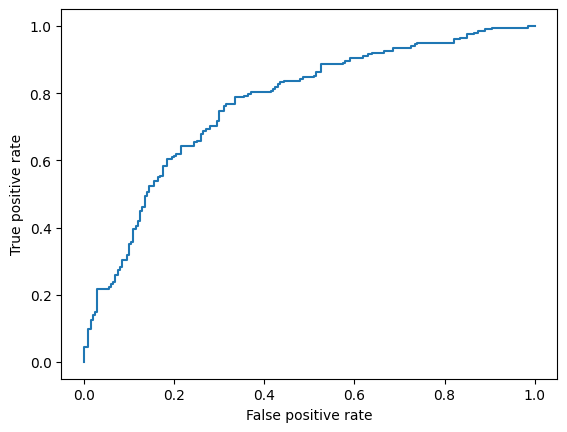

In [29]:
fpr, tpr, threshold = metrics.roc_curve(test_data["ATTORNEY"], test_pred)
plt.plot(fpr,tpr);plt.xlabel('False positive rate'); plt.ylabel("True positive rate")

In [30]:
roc_auc_test= metrics.auc(fpr, tpr)
roc_auc_test

0.7695544554455446

In [31]:
#Prediction on train data 
train_pred= model.predict(train_data.iloc[ :, 1: ])
print(train_pred)

273     4.130260e-01
537     4.656016e-01
992     5.532238e-01
775     3.623207e-01
47      5.829394e-01
            ...     
990     9.553821e-02
213     4.174142e-01
631     5.731640e-01
1147    7.947024e-08
807     2.243428e-20
Length: 938, dtype: float64


In [32]:
#creating new column and filling with zeros
train_data["train_pred"]= np.zeros(938)
train_data.loc[train_pred > optimal_threshold, "train_pred"]=1

In [33]:
confusion_matrix = pd.crosstab(train_data.train_pred, train_data["ATTORNEY"])
confusion_matrix

ATTORNEY,0,1
train_pred,,
0.0,331,120
1.0,154,333


In [34]:
accuracy_train = (347+323)/(938)
accuracy_train

0.7142857142857143

In [35]:
import pickle
pickle.dump(model,open("logit.pkl","wb"))

In [36]:
model = pickle.load(open("C://Users//ajay//OneDrive//Desktop//DE final project//logit.pkl","rb"))
print(model)

In [37]:
test_pred = model.predict(test_data)
test_pred

1335    5.939766e-01
149     6.698432e-01
174     4.514131e-01
960     3.239482e-01
557     5.959329e-01
            ...     
791     2.837296e-11
723     3.872422e-01
291     4.464120e-01
1025    4.559788e-01
728     3.783723e-01
Length: 402, dtype: float64

In [38]:
type(test_data)

pandas.core.frame.DataFrame